# Problem Statement
#### The main goal of the case study is to build ML models to predict churn. 
The model will be used for the following purposes:bservations.

1. To predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. To identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In [2]:
# Required Imports
!pip install xgboost
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Required Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

import imblearn
from imblearn.over_sampling import SMOTE

#Modules for PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA


#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# XGBoosting
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, learning_curve
import xgboost as xgb

### Importing the data

In [4]:
df = pd.read_csv('C:/Users/Kris/Upgrad/Telecom Churn Case Study/Data/train.csv')
data_dict = pd.read_csv("C:/Users/Kris/Upgrad/Telecom Churn Case Study/Data/data_dictionary.csv")
final_test_df = pd.read_csv("C:/Users/Kris/Downloads/telecom-churn-case-study-hackathon-c53/test.csv")
df.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


In [6]:
for each in df.columns: print(each)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

## EDA

### Data Details 

In [7]:
df.info(verbose=True,show_counts=True,memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

### Handling Missing Columns

In [8]:
df.dropna(thresh=len(df)*0.3,axis=1,inplace = True)
print(f"Shape of Data after dropping columns that have more than 30% of missing values: {df.shape}")

Shape of Data after dropping columns that have more than 30% of missing values: (69999, 142)


In [9]:
df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.077730,0.081958,0.075344,0.081444,0.085487,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.383189,0.381821,0.573003,0.634547,0.680035,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,0.000000,0.000000,0.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,0.000000,0.000000,0.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


#### Dropping variables that do not have more than 25% variance

In [10]:
ord_enc = OrdinalEncoder()
  
# Transform the data
df1 = ord_enc.fit_transform(df)

from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(df1)

var_thr.get_support()

concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]

for features in concol:
    if features == 'churn_probability': concol.remove(features)
    print(features)
    
df.drop(concol, axis=1, inplace=True)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
monthly_2g_6
monthly_2g_7
monthly_2g_8
monthly_3g_6
monthly_3g_7
monthly_3g_8
churn_probability


In [11]:
df.info(verbose=True,show_counts=True,memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 123 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    id                   69999 non-null  int64  
 1    arpu_6               69999 non-null  float64
 2    arpu_7               69999 non-null  float64
 3    arpu_8               69999 non-null  float64
 4    onnet_mou_6          67231 non-null  float64
 5    onnet_mou_7          67312 non-null  float64
 6    onnet_mou_8          66296 non-null  float64
 7    offnet_mou_6         67231 non-null  float64
 8    offnet_mou_7         67312 non-null  float64
 9    offnet_mou_8         66296 non-null  float64
 10   roam_ic_mou_6        67231 non-null  float64
 11   roam_ic_mou_7        67312 non-null  float64
 12   roam_ic_mou_8        66296 non-null  float64
 13   roam_og_mou_6        67231 non-null  float64
 14   roam_og_mou_7        67312 non-null  float64
 15   roam_og_mou_8    

### Isolating non numerical variables

In [12]:
df_non_num = df.select_dtypes(exclude = [np.number])

In [13]:
df_non_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  68898 non-null  object
 1   date_of_last_rech_7  68765 non-null  object
 2   date_of_last_rech_8  67538 non-null  object
dtypes: object(3)
memory usage: 1.6+ MB


In [14]:
for i in df_non_num:
    print(i,":",df_non_num[i].unique(),"\n")

date_of_last_rech_6 : ['6/22/2014' '6/12/2014' '6/11/2014' '6/15/2014' '6/25/2014' '6/30/2014'
 '6/29/2014' '6/20/2014' '6/28/2014' '6/27/2014' '6/26/2014' '6/19/2014'
 '6/23/2014' '6/24/2014' '6/14/2014' nan '6/5/2014' '6/8/2014' '6/6/2014'
 '6/16/2014' '6/13/2014' '6/18/2014' '6/21/2014' '6/17/2014' '6/10/2014'
 '6/7/2014' '6/2/2014' '6/1/2014' '6/3/2014' '6/9/2014' '6/4/2014'] 

date_of_last_rech_7 : ['7/10/2014' '7/22/2014' '7/21/2014' '7/26/2014' '7/27/2014' '7/19/2014'
 '7/30/2014' '7/16/2014' '7/31/2014' '7/20/2014' '7/25/2014' '7/29/2014'
 '7/28/2014' nan '7/7/2014' '7/18/2014' '7/13/2014' '7/17/2014'
 '7/12/2014' '7/24/2014' '7/15/2014' '7/1/2014' '7/23/2014' '7/9/2014'
 '7/8/2014' '7/14/2014' '7/5/2014' '7/4/2014' '7/11/2014' '7/6/2014'
 '7/2/2014' '7/3/2014'] 

date_of_last_rech_8 : ['8/24/2014' '8/26/2014' '8/25/2014' '8/30/2014' '8/28/2014' '8/19/2014'
 '8/5/2014' '8/27/2014' '8/16/2014' '8/21/2014' '8/22/2014' '8/23/2014'
 nan '8/15/2014' '8/31/2014' '8/12/2014' '8/10/201

### Function to obtain only the day of the month rather than the entire date

In [15]:
def dt_fn(x):
    if x==None:
        return None
    elif isinstance(x,str):
        return int(str(x).split('/')[1])
    else:
        return None

In [16]:
df.date_of_last_rech_6 = (df.date_of_last_rech_6.apply(dt_fn))
df.date_of_last_rech_7= (df.date_of_last_rech_7.apply(dt_fn))
df.date_of_last_rech_8 = (df.date_of_last_rech_8.apply(dt_fn))

In [17]:
df[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
0,22.0,10.0,24.0
1,12.0,10.0,26.0
2,11.0,22.0,24.0
3,15.0,21.0,25.0
4,25.0,26.0,30.0
...,...,...,...
69994,18.0,31.0,31.0
69995,28.0,31.0,27.0
69996,25.0,30.0,29.0
69997,29.0,19.0,26.0


### Handling missing values

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df = missing_value_df[missing_value_df['percent_missing'] != 0]
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
loc_og_t2f_mou_8,loc_og_t2f_mou_8,5.290076
loc_og_t2m_mou_8,loc_og_t2m_mou_8,5.290076
std_og_mou_8,std_og_mou_8,5.290076
og_others_8,og_others_8,5.290076
std_og_t2f_mou_8,std_og_t2f_mou_8,5.290076
...,...,...
std_ic_t2t_mou_7,std_ic_t2t_mou_7,3.838626
onnet_mou_7,onnet_mou_7,3.838626
date_of_last_rech_8,date_of_last_rech_8,3.515765
date_of_last_rech_7,date_of_last_rech_7,1.762882


In [19]:
# df.dropna(inplace=True)

### Splitting Data into Training and Test Sets

In [20]:
# Putting feature variable to X
X = df.drop(['churn_probability'],axis=1)

# Putting response variable to y
y = df['churn_probability']

In [21]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=33)

In [22]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 


Before Undersampling, counts of label '1': 4993
Before Undersampling, counts of label '0': 44006 



### Handle the imbalanceness of the data using SMOTE

In [23]:
imputer = KNNImputer(n_neighbors=5)
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

In [24]:
# transform the dataset

sm = SMOTE(random_state = 33) 
X_train_smote, y_train_smote = sm.fit_resample(X_train_imp, y_train)
X_test_smote, y_test_smote = sm.fit_resample(X_test_imp, y_test)

In [25]:
print(f"mean of X train before using SMOTE: {np.mean(X_train_imp)}")
print(f"median of X train before using SMOTE: {np.median(X_train_imp)}")
print(f"mean of X train after using SMOTE: {np.mean(X_train_smote)}")
print(f"median of X train after using SMOTE: {np.median(X_train_smote)}")

mean of X train before using SMOTE: 369.1177177632265
median of X train before using SMOTE: 1.68
mean of X train after using SMOTE: 355.70314658607373
median of X train after using SMOTE: 1.658563408066875


In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_trans = sc.fit_transform(X_train_smote)
X_test_trans = sc.transform(X_test_smote)

### Step 4 - PCA

Implementing PCA to simplify high-dimensional data while preserving trends and patterns. Since this dataset has 122 variables, we can reduce the number of variables to help the model perform better

In [27]:
n_batches = 100 

inc_pca = IncrementalPCA()

for batch_x in np.array_split(X_train_trans, n_batches):
    inc_pca.partial_fit(batch_x)

cumsum = np.cumsum(inc_pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) +1

print(d) # Print the number of dimentions required to preserve 95% of variance -

67


In [28]:
X_tmp = inc_pca.transform(X_train_trans)

In [29]:
# for i in range(120):
#     print(sum(inc_pca.explained_variance_ratio_[0:i])) 

print (X_tmp[:,range(d)].shape)

(88012, 67)


In [30]:
var_cumu = np.cumsum(inc_pca.explained_variance_ratio_)

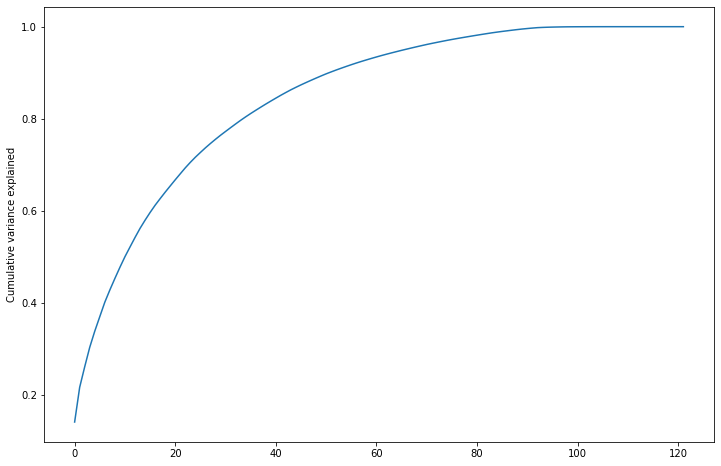

In [31]:
fig = plt.figure(figsize=[12,8])

plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [32]:
pca_comp = IncrementalPCA(n_components=d)

In [33]:
df_train_pca = pca_comp.fit_transform(X_train_trans)
df_train_pca.shape

(88012, 67)

In [34]:
df_test_pca = pca_comp.transform(X_test_trans)
df_test_pca.shape

(37722, 67)

### Step 5 -  Apply Logistic Regression

In [35]:
grid={'C':[0.0001, 0.001, 0.1, 1, 10, 100], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='newton-cg', max_iter=1000)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(df_train_pca,y_train_smote)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8295688884582507


In [36]:
# To beat: 83.11%
# To beat: 87%

In [37]:
log_reg = LogisticRegression(C=0.1, penalty="l2")
log_reg_model = log_reg.fit(df_train_pca,y_train_smote)

In [38]:
pred_test = log_reg_model.predict_proba(df_test_pca)

### Step 6 -  Model Evaluation of Logistic Regression

In [39]:
y_pred_df = pd.DataFrame(pred_test[:,1])
y_pred_df = y_pred_df[0].apply(lambda x : 0 if x < 0.5 else 1)
y_pred_df

0        0
1        0
2        0
3        0
4        0
        ..
37717    1
37718    1
37719    1
37720    1
37721    1
Name: 0, Length: 37722, dtype: int64

In [48]:
log_auc = metrics.roc_auc_score(y_test_smote, y_pred_df)
log_acc = accuracy_score(y_test_smote, y_pred_df)
log_prec = precision_score(y_test_smote, y_pred_df)
log_rec = recall_score(y_test_smote, y_pred_df)
log_f1 = f1_score(y_test_smote, y_pred_df)
log_rms = mean_squared_error(y_test_smote, y_pred_df, squared=False)


print("AUC: ", log_auc)
print("Accuracy: ", log_acc)
print("Precision: ", log_prec)
print("Recall: ", log_rec)
print("F1 Score: ", log_f1)
print("RMS: ", log_rms)

AUC:  0.8356131700334022
Accuracy:  0.8356131700334023
Precision:  0.8083593141075605
Recall:  0.8798048883940406
F1 Score:  0.8425702607326919
RMS:  0.40544645758299297


### Step 7 -  XGBoost

In [41]:
xgb_cfl = xgb.XGBClassifier(objective = 'binary:logistic')

In [42]:
# Hyperparameter 
params = {
        'n_estimators' : [100, 200, 500, 750, 1000], 
        'learning_rate' : [0.001, 0.01, 0.1, 0.25, 0.33],  
        'min_child_weight': [7, 10, 13],
        'gamma': [0.1, 0.5, 1, 1.5],
        'subsample': [0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6],
        'max_depth': [5, 10, 15, 20]
        }

folds = 5

param_comb = 50

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', cv=5, verbose=3, random_state=33)

In [43]:
random_search.fit(df_train_pca,y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.33, max_depth=20, min_child_weight=13, n_estimators=500, subsample=0.4;, score=0.932 total time=  15.1s
[CV 2/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.33, max_depth=20, min_child_weight=13, n_estimators=500, subsample=0.4;, score=0.943 total time=  14.9s
[CV 3/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.33, max_depth=20, min_child_weight=13, n_estimators=500, subsample=0.4;, score=0.942 total time=  15.9s
[CV 4/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.33, max_depth=20, min_child_weight=13, n_estimators=500, subsample=0.4;, score=0.942 total time=  14.8s
[CV 5/5] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.33, max_depth=20, min_child_weight=13, n_estimators=500, subsample=0.4;, score=0.940 total time=  14.9s
[CV 1/5] END colsample_bytree=0.4, gamma=1, learning_rate=0.001, max_depth=5, min_child_weight=10, n_estimat

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=No

In [44]:
print('Best estimator:')
print(random_search.best_estimator_)
print('\nBest accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\nBest hyperparameters:')
print(random_search.best_params_)

Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Best accuracy for 5-fold search with 50 parameter combinations:
0.9521201959905465

Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsamp

### XGBoost Model Evalutaion

In [47]:
xgb_predictions_hpt = random_search.predict(df_test_pca)

xgb_auc = metrics.roc_auc_score(y_test_smote, xgb_predictions_hpt)
xgb_acc = accuracy_score(y_test_smote, xgb_predictions_hpt)
xgb_prec = precision_score(y_test_smote, xgb_predictions_hpt)
xgb_rec = recall_score(y_test_smote, xgb_predictions_hpt)
xgb_f1 = f1_score(y_test_smote, xgb_predictions_hpt)
xgb_rms = mean_squared_error(y_test_smote, xgb_predictions_hpt, squared=False)

print("AUC: ", xgb_auc)
print("Accuracy: ", xgb_acc)
print("Precision: ", xgb_prec)
print("Recall: ", xgb_rec)
print("F1 score: ", xgb_f1)
print("RMS: ", xgb_rms)

AUC:  0.8556280154816819
Accuracy:  0.8556280154816818
Precision:  0.9226794378977882
Recall:  0.7763109061025396
F1 score:  0.8431903253671177
RMS:  0.3799631357359793


### Model Comparison

In [49]:
t_dict = {'Measures': ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'RMS'], 'Logistic Regression': [log_auc, log_acc, log_prec, log_rec, log_f1, log_rms], 'XGBoost': [xgb_auc, xgb_acc, xgb_prec, xgb_rec, xgb_f1, xgb_rms]} 
pd.DataFrame(t_dict)

,Measures,Logistic Regression,XGBoost
0,AUC,0.835613,0.855628
1,Accuracy,0.835613,0.855628
2,Precision,0.808359,0.922679
3,Recall,0.879805,0.776311
4,F1 score,0.842570,0.843190
5,RMS,0.405446,0.379963


### Problem Statement:

Since the primary concern is to ensure that positives (e.g., identifying customers who will churn) are correctly classified, rather than focusing on minimizing false negatives, then precision becomes the most important metric.

Precision measures the proportion of true positive predictions out of all positive predictions made by the model. In other words, it evaluates the model's ability to avoid false positives. A higher precision indicates fewer false positives, meaning that the model is better at correctly identifying customers who will churn without mistakenly classifying too many non-churners as churners.

Therefore, in this scenario, where the emphasis is on getting the positives right, the model with the highest precision would be considered the best choice and therefore we can proceed with the XGBoost model with the hyperparameters seen above.

### Step 9 -  Drawing Inferences

In [55]:
# Find important features index

df_feature = pd.DataFrame(random_search.best_estimator_.feature_importances_)
df_feature.columns = ['feature_importance']
df_feature.nlargest(6,'feature_importance')

,feature_importance
1,0.068373
6,0.063997
0,0.043146
5,0.030017
27,0.027649
15,0.024928


In [56]:
# Find important features name

pos = [1,6,5,27,15]
colname = X.columns[pos]
colname

Index(['arpu_6', 'onnet_mou_8', 'onnet_mou_7', 'loc_og_t2c_mou_8',
       'roam_og_mou_8'],
      dtype='object')

#### The most important features that can help with identifiying churn are:
1. Average Revenue per user
2. All kind of calls within the same operator network in minutes of usage in the latest month
3. All kind of calls within the same operator network in minutes of usage in the month previous to the latest month
4. Local outgoing calls  within same telecom circle to the operator in minutes of usage 
5. Indicates that customer is in roaming zone during the outgoing call in minutes of usage